# TASK 3 : EMAIL SPAM DETECTION WITH MACHINE LEARNING

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.express as px
import plotly.graph_objects as go

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('C:\\Users\\VAISHNAVI DAKARE\\AppData\\Local\\Temp\\Rar$DIa0.051\\spam.csv')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

In [9]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [10]:
df.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [11]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [12]:
round(df.describe().T)

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,GE,2
Unnamed: 4,6,5,"GNT:-)""",2


In [13]:
import os
for dirname, _, filenames in os.walk('C:\\Users\\VAISHNAVI DAKARE\\AppData\\Local\\Temp\\Rar$DIa0.051\\spam.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [14]:
FIRST_ROW = df.shape[0]

In [15]:
def dataLoking(df):
    display(df.head())
    print()
    display(f"We have got {FIRST_ROW} rows and {df.shape[1]} columns. Briefly the dataset consist of {df.shape}")
    print()
    display(df.info())
    print()
    display(df.describe(include="all"))
    print()

In [16]:
dataLoking(df)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


'We have got 5572 rows and 5 columns. Briefly the dataset consist of (5572, 5)'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


None

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""",GE,"GNT:-)"""
freq,4825,30,3,2,2


In [17]:
def dataCleaning(df):
    #dropping
    df.drop(columns=df.iloc[:,2:5], inplace=True)
    
    # Rename
    df.rename(columns={"v1":"Target","v2":"Text"},inplace=True)
    
    # Label Encoder
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    df["Target"] = encoder.fit_transform(df["Target"])
    
    # Duplicated Values
    df.duplicated().sum()
    df = df.drop_duplicates(keep="first")
    df.duplicated().sum()
    droppingRowNumber = FIRST_ROW-df.shape[0]
    afterDroppingRow = df.shape[0]
    dfhead= df.head()
    print("Before dropping row numbers:",FIRST_ROW,"\n","\n","Dropping row numbers:",droppingRowNumber,"\n","After dropping row numbers:",afterDroppingRow,"\n\n",dfhead)

In [18]:
dataCleaning(df)

Before dropping row numbers: 5572 
 
 Dropping row numbers: 403 
 After dropping row numbers: 5169 

    Target                                               Text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...


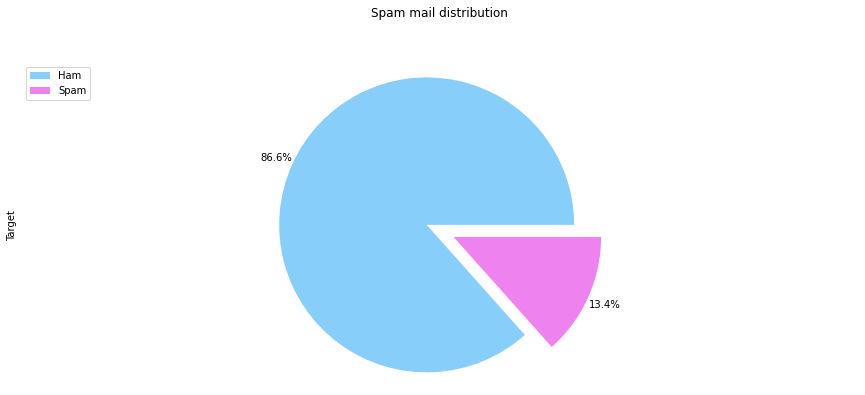

In [25]:
colors_list=["lightskyblue","violet"]
explode_list=[0.1,0.1]

df["Target"].value_counts().plot(kind="pie",
                                 figsize=(15,6),
                                autopct="%1.1f%%",
                                pctdistance=1.12,
                                 labels=None,
                                colors=colors_list,
                                explode=explode_list)
plt.title("Spam mail distribution",y=1.12)
plt.axis("equal")
plt.legend(labels=["Ham","Spam"],loc="upper left")
plt.show()

In [26]:
def feature_eng(df):
    df["text_num_char"]=df["Text"].apply(len)
    df["text_num_words"]=df["Text"].apply(lambda x:len(nltk.word_tokenize(x)))
    df["text_num_sentences"] = df["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))
    return df.head()

In [35]:
def histplot(df,feature,variable):
    plt.figure(figsize=(20,8))
    sns.histplot(df[df[feature] ==0][variable],color="black")
    sns.histplot(df[df[feature] ==1][variable],color="red")

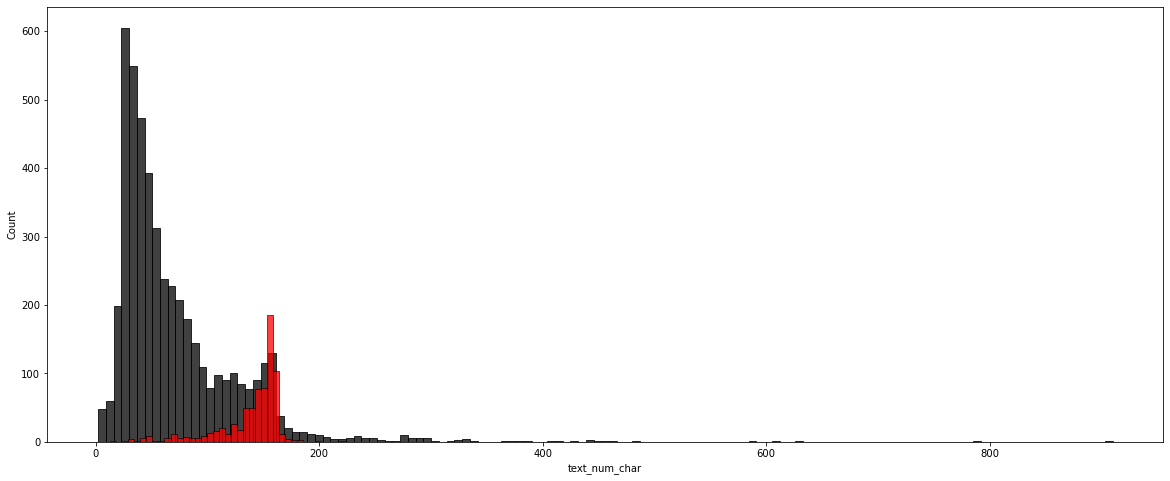

In [32]:
histplot(df,"Target","text_num_char")

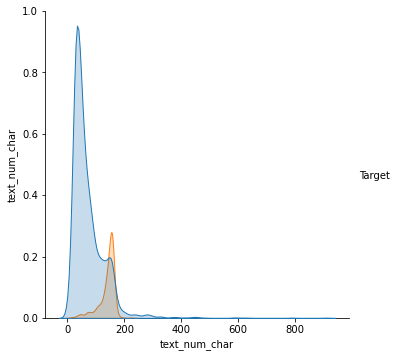

In [37]:
sns.pairplot(df,hue="Target",height=5);

<AxesSubplot:>

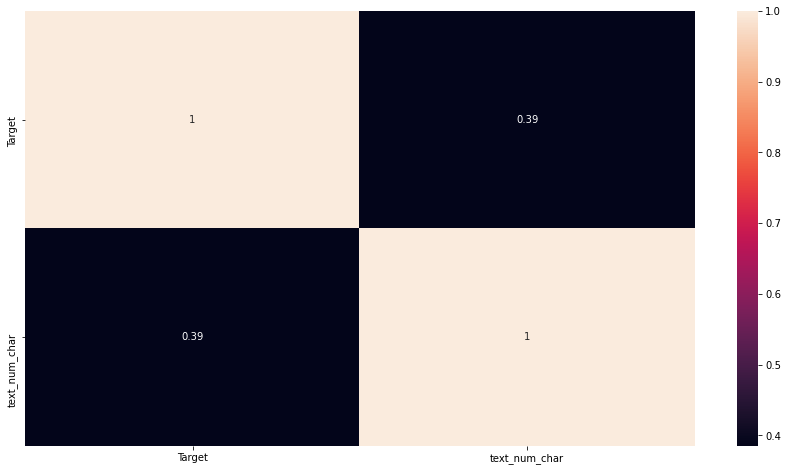

In [38]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

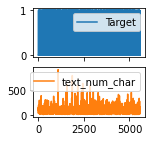

In [43]:
df.plot(subplots=True,figsize=(2,2));

<AxesSubplot:ylabel='Frequency'>

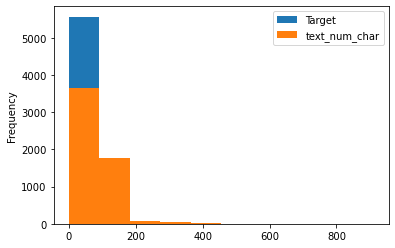

In [45]:
df.plot.hist()